In [1]:
## importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_blobs
warnings.filterwarnings("ignore")



In [10]:
X,y = make_blobs(n_samples=1000,centers =3, n_features=2)

In [11]:
X

array([[-2.42954165, -6.59178105],
       [-4.16114222, -8.1218356 ],
       [-4.43085526, 11.40102913],
       ...,
       [ 2.00646163,  2.05142455],
       [-4.34287911, -9.11922456],
       [-6.91962001, 10.69446065]])

In [15]:
y # we are not going to use it , for verification  We print the labels

array([0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2,
       0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1, 1,
       2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 2, 0,
       2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1,
       0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0,
       0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0,
       2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1,
       0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2,
       1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2,

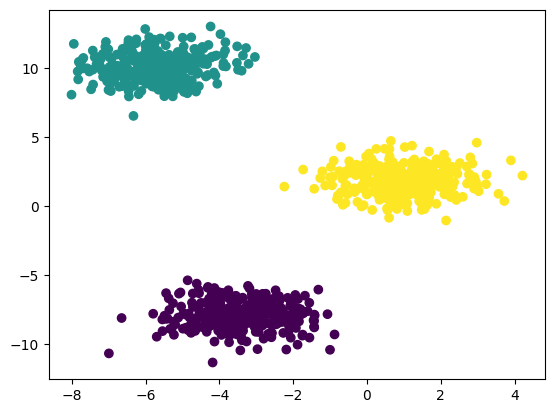

In [22]:
 plt.scatter(X[:,0],X[:,1],c=y)

In [24]:
## Standardization - feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [27]:
## we are not going to use y_train and y_test in the above

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.cluster import KMeans

In [29]:
## Elbow method to select K value
wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [30]:
wcss

[1340.000000000001,
 800.748878910131,
 87.26233083181106,
 69.8549345738509,
 66.74752917374768,
 48.93676805470842,
 35.158963920292024,
 30.354464984474774,
 25.95987050340726,
 24.04989037970574]

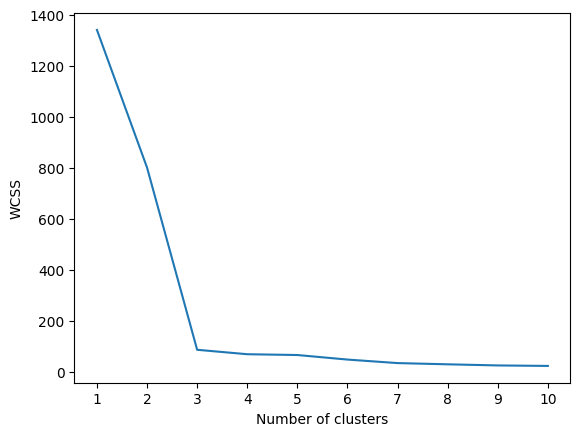

In [31]:
## plot elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [32]:
    kmeans = KMeans(n_clusters=3, init = "k-means++")


In [33]:
kmeans.fit_predict(X_train_scaled)

array([2, 1, 2, 1, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 2,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 2,
       1, 0, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2,
       0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0, 1,
       2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2,
       2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0,
       0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 2,
       0, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 0,
       0, 2, 2, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1,

In [34]:
y_pred = kmeans.predict(X_test_scaled)
y_pred

array([0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1,
       2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2,
       1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 2, 0, 2, 0,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2,
       2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 0,
       0, 1, 2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       2, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2,
       2, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 2,
       2, 0, 1, 2, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2,

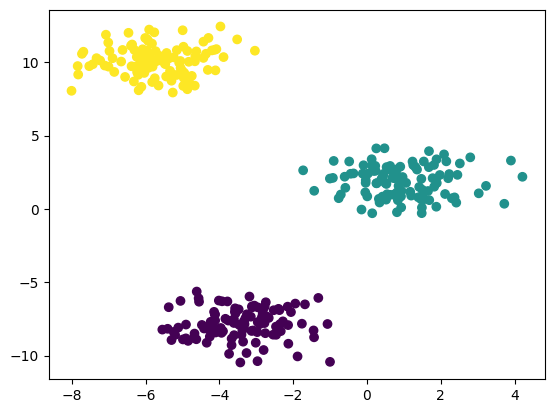

In [36]:
plt.scatter(X_test[:,0],X_test[:,1], c = y_pred)

In [37]:
## validating the k value
### kneelocator
###silhoutee scoring

In [39]:
##kneelocator
!pip install kneed

In [44]:
from kneed import KneeLocator
kl  = KneeLocator(range(1,11),wcss,curve ='convex', direction ='decreasing')

In [45]:
kl.elbow

3

In [46]:
### silhoute scoring
from sklearn.metrics import silhouette_score

In [47]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [48]:
silhouette_coefficients

[0.6217815316916915,
 0.7938093323386881,
 0.664079189910329,
 0.5493400525269981,
 0.5416159348327338,
 0.4333403058730341,
 0.4156855601083273,
 0.40553897470853034,
 0.37087868926998646]

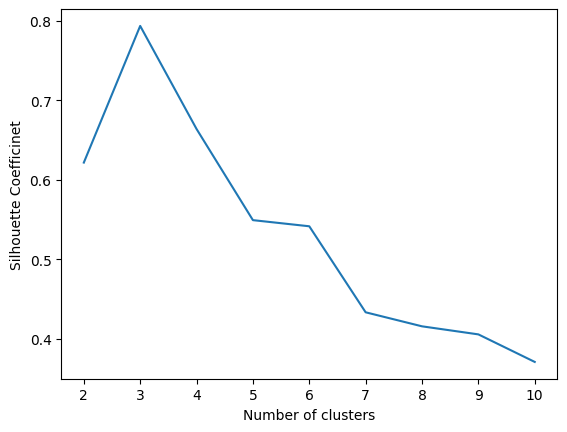

In [49]:
# plot elbow curve
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficinet")
plt.show()